# Solution to the Lab 1 
In this notebook, we use the following modules `numpy` and `maze`. The latter is a home made module, where all the solutions to the questions are implemented. We will refer to it at each answer, and we encourage you to read it.

In [1]:
import numpy as np
import maze as mz

# Problem 1: Shortest path in the maze

The objective of problem 1 is to solve the shortest path problem in a maze. We start first by describing the maze as a numpy array. 

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

The method `maze.draw_maze()` helps us draw the maze given its numpy array discription.  

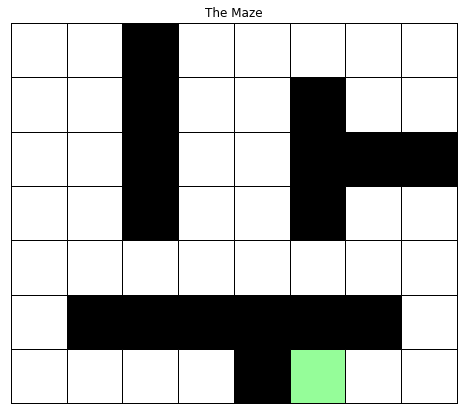

In [3]:
mz.draw_maze(maze)

## MDP formulation (NEED TO ADAPT TO LAB 1)

We propose the following MDP formulation: 

#### State space $\mathcal{S}$
We model the state space as the set of all possible positions of the player in the maze. Note that we exclude the obstacles' position since these are impossible states to be in for the player. Formally, the state space is

$$\mathcal{S} = \big\lbrace (i,j):\textrm{such that the cell
} (i,j) \textrm{ is not an obstacle}\big\rbrace.$$
> **Note:** The choice of state space is not unique. For instance one could consider $\mathcal{S}$ to be the set of all positions in the  maze regardless of whether they correspond to an obstacle or not. But note that, this will increase the size $\vert \mathcal{S} \vert $. This is fine for small mazes, but it leads to many redundant states as the maze dimension increases.

#### Action space $\mathcal{A}$
We allow the player to chose to either move `left`, `right`, `down`, `up` or not move at all (`stay`). Note that sometimes the player cannot move in a certain direction because of an obstacle or a wall, yet we permit this to be action. We will see that this is not an issue as long as we define our transition probabilities and rewards appropriately.
Formally, the action space is

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$
> **Note:** Once again, the choice of the action space is not unique. For instance one could remove the action `stay` from $\mathcal{A}$, but then one should modify the transition probabilities accordingly as well as the rewards.  


#### Transition probabilities $\mathcal{P}$
Note that there is no randomness involved upon taking an action by the player. As a consequence, the transition probabilities are deterministic. More precisely,   
- If at state (or position) $s$ taking action (or move) $a$ does not lead to a wall or an obstacle but to another state (or position) $s'$, then $\mathbb{P}(s' \vert s, a) = 1$. 
- If at state (or position)  $s$ taking action (or move) $a$ leads to a wall or an obstacle, the player remains in his state (or position) $s$, then $\mathbb{P}(s \vert s, a) = 1$.

> **Note**: Recall that for a fixed $s \in \mathcal{S}$ and $a \in \mathcal{A}$ we have $\sum_{s' \in \mathcal{S}} \mathbb{P}(s' \vert s, a) = 1$, thus if for some $s' \in \mathcal{S}$  we have $\mathbb{P}(s' \vert s, a) = 1$, then for all $s'' \in \mathcal{S} \backslash \lbrace s'\rbrace$ we have $\mathbb{P}(s'' \vert s, a) = 0$,

#### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles.    
   - If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to some other position in the maze that is not the exit nor a wall nor an obstacle, then $r(s, a) = -1$. 
   - If at state $s$, taking action $a$, leads to the exit then $r(s ,a) = 0$. 
> **Note**: Here the rewards are independent of time (i.e. $r_t(.,.) = r(.,.)$). 


### Implementation
The above MDP formulation is implemented as a class ``maze.Maze`` in the file [maze.py](./maze.py) which given a matrix description of the maze instanciates the state space, action space, transition probabilities and rewards. 

> **Note:** In the class `maze.Maze` each state $s = (i,j)$ is given a unique identifier $s_{id} \in \lbrace 0, , \dots, \vert S \vert -1 \rbrace$. In other words, the state space from an implementation perspective is viewed as the set of integers $\lbrace 0, , \dots, \vert S \vert -1 \rbrace$. This mapping is done via the dictionary `self.map` and its inverse mapping via the dictionary `self.states`.   

In [4]:
# Create an environment maze
env = mz.Maze(maze, minotaur_stay=False, cross_minotaur=True, jumping_allowed=False)
#env.show()

In [5]:
# 40 represents the number of possible positions in the maze (8*7-walls = 40)
# 5 represents the number of possible actions in every position
env.rewards.shape

(40, 40, 5)

##  Dynamic Programming 

Before solving the MDP problem, recall that the finite horizon objective function is 
$$
    \mathbb{E} \Big[ \sum_{t=0}^T r(s_t, a_t) \Big],
$$
where $T$ is the horizon.
Recall the Bellman equation 
\begin{equation}
\forall s \in \mathcal{S} \qquad  V(s) = \max_{a \in \mathcal{A}} \Big\lbrace r(s,a) + \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,a) V(s') \Big\rbrace
\end{equation}
The dynamic programming solution for the finite horizon MDP problem consists of solving the above backward recursion. The method `maze.dynamic_programming` achieves this. 
> **Note:** To find the optimal path, it is enough to set the time horizon $T = 10$. Indeed, looking at the maze one can see that the player needs at least 10 steps to attain the exit $B$, if her starting position is at $A$. In fact if you set the time horizon less than 10, you will see that you do not find the optimal path.



In [6]:
# Finite horizon
horizon = 13
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);

In [8]:
# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0);
path, _, _ = env.simulate(start, policy, method,start_minotaur=(6, 5));

t:  0
t:  1
t:  2
t:  3
t:  4
t:  5
t:  6
t:  7
t:  8
t:  9
t:  10
t:  11
t:  12
t:  13


In [9]:
path

[(0, 0),
 (0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 7),
 (6, 7),
 (6, 6)]

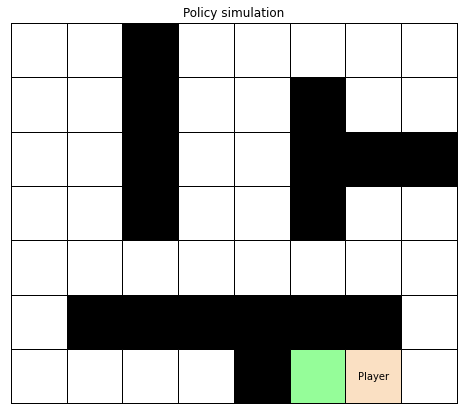

In [17]:
# Show the shortest path 
mz.animate_solution(maze, path)

In [20]:
path

[(0, 0),
 (0, 1),
 (0, 1),
 (1, 1),
 (2, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 7),
 (6, 7),
 (6, 6),
 (6, 5),
 (6, 5)]

In [18]:
V[0, 10, 0]

0.9318981115769523

In [14]:
import matplotlib.pyplot as plt

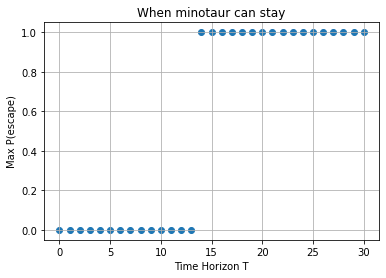

In [27]:
max_probs = []
start_player = env.map[(0,0)]
start_minotaur = env.map[(6,5)]
for T in range(0,31):
    horizon = T    
    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,horizon)
    # Value of start state at t=0
    max_probs.append(V[start_player, start_minotaur, 0]) 
_ = plt.title("When minotaur can stay")
_ = plt.grid("on")
_ = plt.xlabel("Time Horizon T")
_ = plt.ylabel("Max P(escape)")
_ = plt.scatter(range(0,len(max_probs)), max_probs)
_ = plt.savefig("When minotaur can stay.png")

In [26]:
horizon=13
V, policy= mz.dynamic_programming(env,horizon)
V[start_player, start_minotaur, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Value Iteration

Here we solve the discounted infinite-horizon MDP problem using value iteration, the objective here is to find a stationary policy $\pi$ that minimizes the infinite horizon objective with a discount factor $\gamma$ 
$$
    \mathbb{E} \Big[\sum_{t=0}^\infty \gamma^t r\big(s_t, \pi(s_t)\big) \Big].
$$
Recall the Bellman equation in the case of a stationary policy $\pi$ 
\begin{equation}
\forall s \in \mathcal{S} \qquad  V^*(s) = \max_{\pi} \Big\lbrace r(s,\pi(s)) + \gamma \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,\pi(s)) V^*(s') \Big\rbrace
\end{equation}
or equivalently in terms of the Bellman operator $\mathcal{L}$ 
\begin{equation}
V^* =  \mathcal{L}(V^*)
\end{equation}
where 
\begin{equation}
   \forall s \in \mathcal{S} \qquad  \mathcal{L}(V)(s) = \max_{\pi} \Big\lbrace r(s,\pi(s)) + \gamma \sum_{s' \in \mathcal{S}} \mathbb{P}(s'\vert s,\pi(s)) V(s') \Big\rbrace. 
\end{equation}
Value iteration solves the Bellman equation described above. This method is implemented as `maze.value_iteration` in the file [maze.py]().

> **Note:** Recall that the mapping $\mathcal{L}$ is a contraction, therefore value iteration converges. To achieve an $\varepsilon>0$ approximation (i.e. $\Vert V^* - V_{n+1} \Vert \le \varepsilon$),
 the stopping criterion of value iteration is $\Vert V - \mathcal{L}(V) \Vert < \frac{1-\gamma}{\gamma}\varepsilon$.

In [6]:
# Discount Factor 
gamma   = 1-1/30;
# Accuracy treshold 
epsilon = 0.001;
V, policy = mz.value_iteration(env, gamma, epsilon)

In [7]:
policy.shape

(40, 40)

In [8]:
policy[8,:]

array([4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4], dtype=int64)

In [17]:
method = 'ValIter';
start  = (0,0);

paths = list()
exited_maze_list = list()
t_list = list()

n_iters = 10000
for i in range(n_iters):
    path, exited_maze, t = env.simulate(start, policy, method, life_mean=30, start_minotaur=(6,5))
    exited_maze_list.append(exited_maze)


1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 21
28 29
29 21
30 29
32 30
39 29
38 30
1 38
8 39
14 38
18 39
24 38
25 39
26 32
27 39
28 32
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 37
28 38
1 38
8 37
14 38
18 37
24 38
25 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 22
29 30
30 29
32 21
39 22
38 21
1 38
8 39
14 38
18 39
24 32
25 30
26 29
1 38
8 39
14 32
18 39
1 38
8 39
14 32
18 30
24 32
25 30
26 29
27 28
1 38
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 22
32 21
39 22
38 30
1 38
8 37
14 38
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 39
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 39
30 32
32 30
39 29
38 30
1 38
8 39
14 32
18 30
24 22
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 

25 30
26 22
27 30
28 22
29 30
30 32
32 39
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 39
30 38
32 37
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 39
39 32
38 30
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 39
1 38
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 30
30 29
32 21
39 22
38 30
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 30
30 29
32 28
39 29
38 30
1 38
8 39
14 32
18 30
24 22
25 21
26 22
1 38
8 37
14 38
18 39
24 32
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 39
30 32
32 39
39 32
38 39
1 38
8 39
14 32
18 39
24 32
25 39
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 22
29 21
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 32
1 38
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 30
28 29
29 21
30 22
32 30
39 29
38 30
1 38
8 39
14 38
18 39


8 39
14 32
18 30
24 32
25 30
26 32
27 39
28 32
29 30
30 29
32 28
39 27
38 28
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 39
28 32
29 30
30 32
32 39
39 38
38 39
1 38
8 39
14 32
18 30
24 22
25 30
26 22
1 38
8 39
14 32
18 30
24 32
25 30
26 22
27 30
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 39
28 32
29 39
30 32
32 39
39 32
38 30
1 38
8 39
14 32
18 30
24 29
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 39
30 32
32 30
1 38
8 37
14 38
18 39
24 38
25 37
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 39
28 38
29 39
30 32
32 30
39 22
38 21
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 39
1 38
8 39
14 38
18 39
24 32
25 30
26 32
27 39
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 38
18 37
1 38
8 39
14 32
18 30
24 29
25 21
26 22
27 21
28 22
29 30
30 29

1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 39
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 37
30 38
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 30
30 22
32 30
39 32
38 39
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 39
28 32
29 39
30 32
32 30
39 22
38 30
1 38
8 37
14 38
18 39
24 38
25 39
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 39
28 32
29 30
30 32
32 30
39 32
38 30
1 38
8 39
1 38
8 37
14 38
1 38
8 37
14 38
18 39
24 32
25 39
26 38
1 38
8 39
14 38
18 39
24 32
25 30
26 29
27 28
28 27
29 28
30 29
32 21
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 37
30 38
1 38
8 39
14 38
18 39
24 32
25 30
26 22
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 39
1 38
1 38
8 39
14 32
18 39
24 38
25 39
26 38
27 39
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 37
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38

30 38
32 39
39 38
38 39
1 38
8 39
14 32
18 30
24 29
25 21
26 29
27 21
28 22
29 21
1 38
8 37
14 38
18 37
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 39
28 32
29 39
30 38
32 37
1 38
8 39
14 32
18 39
24 38
25 37
1 38
8 39
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 39
28 32
29 30
30 29
32 21
39 22
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30 32
32 30
1 38
8 39
14 32
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 39
28 32
29 30
30 29
32 21
39 29
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 39
14 32
18 30
24 29
25 30
26 32
27 39
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 39
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 30
28 22
29 21
30 22
32 2

27 37
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 39
28 32
29 39
30 32
32 39
39 32
38 39
1 38
8 37
14 38
18 39
24 32
1 38
8 39
14 32
18 39
24 32
25 30
26 22
27 30
28 22
29 30
30 22
32 30
39 22
38 30
1 38
8 39
14 32
18 30
24 32
25 39
26 38
27 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 29
32 28
39 27
38 28
1 38
8 39
14 32
18 39
24 32
25 30
26 22
27 30
28 32
29 30
30 32
32 39
39 32
38 30
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 39
30 32
32 39
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 30
28 22
29 30
30 22
32 30
39 29
38 21
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 30
28 22
29 30
30 22
32 30
39 22
38 30
1 38
8 39
14 38
18 39
24 32
25 30
26 29
27 30
28 32
29 39
30 38
32 39
39 32
38 39
1 38
8 39
14 38
18 39
24 38
25 39
26 32
27 30
28 29
29 30
30 32


8 37
14 38
18 39
24 32
25 30
26 32
27 39
28 32
29 39
30 32
32 39
39 32
38 30
1 38
8 39
14 38
18 39
24 32
25 30
26 22
27 21
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 37
28 38
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 22
29 21
30 29
32 28
39 29
38 28
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 21
28 29
29 21
30 29
32 28
39 27
38 28
1 38
8 37
14 38
18 37
24 38
25 37
1 38
8 39
14 38
18 39
24 32
25 39
26 32
27 39
1 38
8 39
14 32
18 30
24 22
25 21
26 22
27 30
28 22
29 30
30 22
32 21
39 22
38 30
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 39
1 38
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 32
29 30
30 32
32 39
39 32
38 39
1 38
8 37
14 38
18 39
1 38
8 39
14 32
18 39
24 32
1 38
8 39
14 38
18 39
24 38
25 39
26 38
27 37
28 38
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 32
29 30
30 32
32 39
39 38
38 39
1 38
8 39
14 32
18 30
24 32
25 39
26 32
27 39
28 32
29 39
30 32
32 39
39 32
38 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38


38 30
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 30
30 32
32 39
39 32
38 30
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 39
26 32
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 39
28 38
29 39
30 38
32 39
39 32
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 37
28 38
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 22
29 30
1 38
8 39
14 32
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
39 22
38 21
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 39
30 32
32 30
39 22
38 30
1 38
8 39
14 32
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 39
30 32
32 39
39 38
38 37
1 38
1 38
8 39
14 32
18 39
24 32
25 30
26 32
27 30
28 29
29 30
30 22
32 30
39 29
38 28
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 30
28 32
29 30
30 29
32 21
39 22
38 21
1 38
8 39
14 38
1 38
8 39
14 38
18 37
1 38
8 39
14 32
18 30
24 29
25 21
26 

30 32
32 30
39 29
38 30
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 30
28 22
29 21
30 22
32 21
39 29
38 30
1 38
1 38
8 37
14 38
18 37
24 38
1 38
8 37
14 38
18 39
24 38
25 37
26 38
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 32
29 30
30 32
32 30
39 32
38 39
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 39
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 30
30 32
32 30
39 22
38 21
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14 32
18 39
24 32
25 30
26 29
27 28
28 27
29 20
30 16
32 20
39 19
38 20
1 38
8 39
14 38
18 39
24 32
25 30
26 22
27 30
28 22
29 21
30 22
32 30
39 32
38 30
1 38
8 37
14 38
18 39
24 38
25 37
26 38
1 38
8 39
14 32
18 30
24 22
25 30
26 32
27 30
28 29
29 28
30 27
32 28
39 27
38 26
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 30
28 32
29 30
30 32
32 30
39 29
38 30
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 

28 29
29 28
30 27
32 20
39 16
38 20
1 38
8 39
14 32
18 30
24 22
25 21
26 22
27 21
28 29
29 21
30 22
32 21
39 29
38 21
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 39
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 30
24 32
25 30
26 32
27 39
28 32
29 39
30 38
32 39
39 38
38 39
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 30
28 22
29 30
30 29
32 30
39 32
38 30
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
1 38
8 39
14 32
18 30
24 29
25 30
26 32
27 39
28 32
29 39
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 37
14 38
18 37
1 38
8 39
14 38
18 39
24 32
25 30
26 22
27 30
28 22
29 21
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 37
28 38
1 38
8 39
14 32
18 39
24 32
25 30
26 22
27 30
28 22
29 21
30 29
32 30
39 22
38 30
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 30
28 22
29 30
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 

26 38
27 37
28 38
29 39
30 32
32 30
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 30
28 29
29 21
30 29
32 30
39 29
38 30
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 39
30 32
1 38
8 39
14 32
18 30
24 32
25 30
26 29
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 39
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 39
28 38
29 39
30 32
32 39
39 32
38 30
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 30
28 29
29 28
30 29
32 21
39 22
38 21
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 32
32 30
39 32
38 30
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38

25 39
26 38
27 39
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 22
32 21
39 22
38 21
1 38
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 39
39 32
38 39
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 22
29 30
30 32
32 30
39 32
38 30
1 38
8 39
14 32
18 39
24 32
25 39
26 38
27 37
28 38
29 39
30 32
32 39
39 32
38 30
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 37
1 38
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 21
28 29
29 21
30 22
32 21
39 29
38 30
1 38
8 39
14 32
18 39
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 39
1 38
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 30
30 22
32 30
39 29
38 30
1 38
8 39
14 32
18 39
24 32
25 30
26 22
27 30
28 32
29 30
30 29
32 28
39 27
38 20
1 38
8 39
14 38
18 37
24 38
1 38
8 39
14 38
18 39
24 38
25 39
26 32
27 30
28 32
29 39
30 32
32 39
39 32
38 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 32
32 39
39 38
38 39
1

8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 32
29 30
30 22
32 30
39 22
38 21
1 38
8 39
14 38
18 39
24 38
25 37
1 38
8 39
14 32
18 30
24 32
25 39
26 32
27 30
28 22
29 21
30 29
32 28
39 29
38 30
1 38
8 39
14 32
18 30
24 22
25 21
26 22
27 21
28 29
29 28
30 29
32 21
39 29
38 28
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 29
29 28
30 29
32 28
39 29
38 28
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 39
30 32
32 39
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 32
32 39
39 32
38 39
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 32
32 30
39 22
38 30
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
1 38
8 39
14 38
18 39
24 32
25 30
26 29
27 21
28 29
29 21
30 22
32 30
39 22
38 30
1 38
8 39
1 38
8 39
14 38
18 37
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 32
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14 32
18 30
24 32
25 39
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 39
24 38
25 37

1 38
8 37
14 38
18 39
1 38
8 37
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 39
28 32
29 39
30 32
32 30
39 22
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 32
29 39
30 32
32 30
39 22
38 30
1 38
8 39
14 32
18 30
24 32
25 39
26 32
27 30
28 22
29 30
30 29
32 21
39 29
38 30
1 38
8 39
14 32
18 39
1 38
8 39
14 32
18 30
24 29
25 30
26 29
27 28
28 29
29 30
30 32
32 30
39 22
38 30
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 30
28 29
29 30
30 32
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 30
28 29
29 21
30 29
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14 38
18 39
24 38
25 37
1 38
8 37
14 38
18 37
24 38
25 37
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 39
28 32
29 30
30 29
32 30
39 22
38 30
1 38
8 39
14 32
1 38
1 38
8 37
14 38
1 38
8 39
14 38
18 39
24 32
25 30
26 32
27 30
28 22
29 30


26 32
27 39
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 39
28 32
29 39
30 32
32 39
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 39
30 32
32 30
39 22
38 30
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30 32
32 30
39 22
38 30
1 38
8 37
14 38
18 39
24 38
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 30
28 29
29 28
30 27
32 26
39 27
38 26
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30 32
32 30
39 22
38 21
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 30
28 29
29 28
30 27
32 20
39 19
38 26
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 39
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 38
29 37


24 38
25 39
1 38
8 39
14 38
18 37
24 38
25 39
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 32
32 39
39 32
38 30
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
39 22
38 21
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 30
28 22
29 21
30 29
32 21
39 22
38 30
1 38
8 39
1 38
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 32
32 39
39 32
1 38
8 37
14 38
18 39
24 38
25 39
26 32
1 38
8 39
14 32
18 30
24 29
25 28
26 29
27 30
28 32
29 30
30 22
32 21
39 29
38 21
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 39
14 38
18 39
24 32
25 30
26 29
27 21
28 22
29 21
30 29
32 28
39 27
38 26
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 30
28 22
29 30
30 22
32 21
39 29
38 30
1 38
8 37
1 38
8 37
14 38
18 39
24 38
25 39
1 38
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26

8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 30
24 29
25 21
26 22
27 21
28 29
29 28
30 27
32 26
39 25
38 24
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 37
28 38
29 39
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 39
1 38
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 39
30 38
32 39
39 32
38 30
1 38
8 37
1 38
8 39
14 32
18 30
24 29
25 30
26 22
27 21
28 29
29 21
30 22
32 21
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 39
28 38
29 39
30 32
32 30
39 29
38 28
1 38
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 39
28 32
29 39
30 32
32 39
39 38
38 37
1 38
8 39
14 32
18 30
24 22
25 21
26 22
27 21
28 22
29 21
30 22
32 21
39 29
38 28
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 39
14 38
18 39
24 32
25 30
26 29
27 28
28 29
29 21
30 22
32 21
39 22
38 21
1 38
8 39
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 30

38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 32
32 39
39 38
38 37
1 38
8 39
14 32
18 39
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 39
30 32
32 30
39 32
38 39
1 38
8 39
14 32
18 30
24 32
25 30
1 38
8 39
14 32
18 39
24 32
25 30
26 22
27 30
28 32
29 30
30 22
32 21
1 38
8 37
14 38
18 37
24 38
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 39
30 32
32 39
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 29
29 28
30 27
32 20
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 30
28 22
29 21
30 29
32 28
39 29
38 28
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 30
28 22
29 21
1 38
8 37
14 38
18 37
24 38
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 30
28 29
29 30
30 29
32 21
39 29
38 30
1 38
8 39
14 32
18 30
24 22
25 30
26 22
27 21
28 22
29 30
30 22
32 21
39 22
38 30
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 39
39 32
38 30
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38


25 37
26 38
27 39
28 32
29 30
30 29
32 30
39 29
38 28
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 21
28 22
29 30
30 29
32 30
39 22
38 21
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 39
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 39
14 32
18 39
24 32
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 39
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 39
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 39
24 38
25 39
26 32
1 38
8 39
14 32
18 39
24 32
25 39
26 38
27 37
28 38
29 39
30 38
32 39
39 32
38 30
1 38
8 39
14 32
18 39
24 32
25 30
26 32
27 39
28 38
29 39
30 32
32 39
39 38
38 39
1 38
8 39
14 32
18 30
1 38
8 39
14 32
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 32
32 30
39 32
38 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 3

29 30
30 22
32 21
39 29
38 28
1 38
8 39
14 38
18 37
24 38
25 39
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 39
28 32
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 38
18 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 30
28 22
29 30
30 22
32 21
39 22
38 30
1 38
8 39
14 38
18 37
24 38
25 39
1 38
8 39
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 39
14 32
18 39
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 37
28 38
1 38
8 39
14 32
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 39
39 32
38 39
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 30
28 22
29 21
30 29
32 21
39 29
38 21
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 37
28 3

27 39
28 38
29 39
30 32
32 39
39 32
38 39
1 38
8 39
14 38
18 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 38
1 38
1 38
8 37
14 38
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 32
32 39
39 32
38 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30 32
32 30
39 32
38 30
1 38
8 39
14 38
18 39
24 32
25 30
26 32
27 39
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 39
24 32
25 30
26 29
27 30
28 22
29 30
30 22
32 30
39 32
38 30
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 38
18 39
24 38
25 39
26 38
27 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30 32
32 30
39 29
38 30
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 28
28 27
29 28
30 29
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 32
1 38
8 37
14 38
1 38
8 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14 32
18 30
24 22
25 30
26 29
27 21
1 38
8 39
14 38
18 37
24 38
25 

14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 32
29 30
30 29
32 21
39 22
38 21
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 39
28 32
1 38
8 39
14 32
18 30
24 29
25 30
26 29
27 30
28 32
29 39
30 32
32 39
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 39
28 32
29 30
30 29
32 30
39 22
38 21
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 39
30 32
32 30
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 32
29 30
30 32
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 30
28 22
29 21
30 22
32 30
39 29
38 21
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 39
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 38
29 39
30 38
32 39
39 38
38 37
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 39
28 38
29 39
30 38
32 39
39 38
38 37


32 39
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 37
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 39
30 32
32 39
39 32
38 30
1 38
8 39
14 32
18 30
24 22
25 21
26 29
27 21
28 29
29 28
30 29
32 28
39 27
38 20
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 30
28 22
29 21
30 29
32 21
39 29
38 28
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 32
29 30
30 22
32 30
39 29
38 21
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 39
1 38
8 37
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 39
39 32
38 30
1 38
8 39
14 32
18 39
24 32
25 30
26 29
27 28
28 29
29 21
30 22
32 30
39 32
38 30
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 30
28 29
29 30
30 29
32 30
39 32
38 30
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 30
28 29
29 30
30 22
32 30
39 32
38 30
1 38
1 38
8 39
14 32
18 30
24 22
25 30
26 32
27 39
28 32
29 39
30 32
32 39
39 38
38 37
1 38
8 39

18 39
24 38
1 38
8 37
14 38
1 38
1 38
8 39
14 32
18 39
24 38
25 39
26 38
27 37
28 38
29 39
30 32
32 39
39 38
38 37
1 38
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 30
30 32
1 38
8 39
14 32
18 30
24 29
25 30
26 29
27 21
28 22
29 30
30 32
32 39
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 37
14 38
18 37
24 38
25 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 37
14 38
18 37
24 38
25 39
26 32
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 39
30 32
32 39
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 30
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 39
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30 38
32 39
39 32
38 39
1 38
8 39
14 38
18 39
24 32
25 30
26 22
1 38
8 39
14 32
18 30
24 32
25 39
26 32
27 30
28 32
29 30
30 22
32 21
39 22
38 30
1 38
8 39
14 38
18 39
24 38
25 39
26 38
27 39
28 32
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14

14 38
18 39
24 32
25 39
26 32
27 30
28 29
29 30
30 29
32 21
39 22
38 21
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 32
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 39
28 32
29 39
30 32
32 30
39 32
38 30
1 38
8 39
14 32
18 39
24 38
25 39
26 38
27 37
28 38
29 39
30 32
32 39
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 39
26 32
1 38
8 37
1 38
8 39
14 32
18 39
24 32
25 30
26 29
27 28
28 27
29 28
30 29
32 28
39 27
38 28
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 30
28 22
29 21
30 22
32 30
39 32
38 30
1 38
8 39
14 32
18 39
24 32
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 39
28 32
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14 38
18 39
24 32
25 30
26 29
27 28
28 27
29 20
30 19
32 20
39 16
38 20
1 38
8 39
14 38
1 38
8 39
14 38
18 39
24 38
25 39
26 32
27 39
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 30
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 39
14 32
18 30
24 32
25 39
26 32
27 39
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 39
14 3

28 32
29 30
30 32
32 30
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 39
14 32
18 39
24 32
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 37
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 39
1 38
8 37
14 38
18 39
24 32
25 30
1 38
8 39
14 32
18 30
24 22
25 21
26 22
27 21
28 22
29 21
30 29
32 30
39 29
38 28
1 38
8 37
14 38
18 39
24 38
25 39
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 39
30 32
32 39
39 32
38 39
1 38
8 39
14 32
18 30
24 29
25 28
26 29
27 28
28 29
29 30
30 32
32 39
39 38
38 37
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 39
14 32
18 30
24 29
25 21
26 29
27 21
28 29
29 30
30 22
32 30
39 29
38 28
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 30
28 29
29 30
30 22
32 21
39 22
38 21
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 39
14 38
18 39
24 3

14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 39
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 39
14 38
18 39
24 38
25 39
26 32
27 39
28 32
29 39
30 32
32 30
39 29
38 21
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 39
14 32
18 30
24 32
25 39
1 38
8 39
14 32
18 30
24 22
25 30
26 32
27 30
28 32
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 38
18 39
24 32
25 39
26 32
27 39
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 32
29 30
30 29
32 28
39 29
38 28
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37


27 37
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 39
1 38
8 39
14 32
18 30
24 22
25 21
26 22
27 30
28 22
29 21
30 29
32 28
39 29
38 21
1 38
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 30
28 22
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 29
29 30
30 22
32 30
39 29
38 30
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 30
28 22
29 30
30 32
32 30
39 29
38 30
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 39
28 38
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 30
30 29
1 38
8 39
14 32
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 39
30 38
32 39
39 32
38 30
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
39 32
38 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 22
32 30
39 22
1 38
8 39
1 38
8 39
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 39
24 38
25 39
26 32
1 3

28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
1 38
8 39
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 39
39 32
38 39
1 38
8 39
14 32
18 39
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 39
14 32
18 30
24 29
25 21
26 22
27 21
28 29
29 28
30 27
32 28
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 39
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 39
14 32
18 30
24 29
25 28
26 27
27 20
28 27
29 20
30 27
32 26
39 27
38 26
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 39
26 38
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 37
1 38
8 39
14 32
18 30
24 29
25 30
26 32
27 39
28 38
29 37
30 38
32 39
39 38
38 39
1 38
8 39
14 32
18 39
24 32
25 30
26 32
27 30
28 32
29 30
30 29
32 30
39 32
1 38
8 39
14 32
18 30
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32

26 32
27 39
28 38
29 39
30 32
32 39
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 32
29 39
30 32
32 30
39 22
38 21
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 39
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 22
29 21
30 22
32 30
39 22
38 21
1 38
8 39
14 32
18 30
24 29
25 28
26 29
27 28
28 29
29 28
30 27
32 26
39 27
38 26
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 39
28 32
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 39
14 38
18 39
24 32
25 30
26 22
27 21
28 22
29 21
30 29
32 28
39 27
38 26
1 38
8 39
14 32
18 30
24 22
25 30
26 22
27 30
28 29
29 21
30 29
32 21
39 22
38 21
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 37
14 38
18 39
24 32
25 30
1 38
8 39
14 32
18 30
24 32
25 39
26 32
27 39
28 38
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 30
28 22
29 21
30 22
32 3

39 38
38 37
1 38
8 39
14 32
18 39
24 32
25 30
26 32
27 30
28 29
29 28
30 27
32 20
39 19
38 20
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 39
28 38
29 39
30 38
32 39
39 38
38 39
1 38
8 39
14 38
18 39
24 32
25 30
26 22
27 21
28 29
29 30
30 32
32 30
39 29
38 21
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 30
28 29
29 30
30 22
32 30
39 22
38 21
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 30
30 29
32 21
39 29
38 30
1 38
8 39
14 32
18 30
24 22
25 21
26 29
27 30
28 32
29 30
30 32
32 39
39 32
38 39
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 32
32 39
39 38
38 39
1 38
8 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 38
29 37
30 38
32 37
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 30
28 32
29 39
30 32
32 39
39 38
38 37
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 22
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 32
32 30
39 32
38 30
1 38
8 37
14 38
18 37
24

27 39
28 32
29 30
30 32
32 30
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 39
1 38
8 39
14 32
18 30
24 22
25 30
26 29
27 28
28 29
29 21
30 22
32 30
39 22
38 30
1 38
8 39
14 38
18 39
24 38
25 39
26 32
27 39
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 32
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 32
29 30
30 29
32 28
39 27
38 26
1 38
8 39
14 32
18 30
24 22
25 21
26 29
27 30
28 29
29 28
30 27
32 26
39 25
38 26
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 39
28 32
29 30
30 32
32 30
39 32
38 30
1 38
8 39
14 32
1 38
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 38
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 22
29 30
30 22
32 21
39 29
38 30
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 30
28 32
29 30
30 32
32 39
39 38
38 39
1 38
8 39
14 32
18 30
24 32
25 39
26 38
27 37
28 38
29 39
30 32
32 39
39 32
38 39
1 38
8 39
14 38

1 38
8 37
14 38
18 39
24 38
25 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 29
32 28
39 27
38 26
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 39
39 38
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 39
28 38
29 39
30 32
32 30
39 32
38 30
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 30
28 29
29 30
30 32
32 39
39 32
38 39
1 38
8 37
14 38
18 39
24 38
25 39
1 38
1 38
8 39
14 32
1 38
8 39
14 38
18 39
24 32
25 39
26 32
27 39
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 30
28 29
29 30
30 29
32 28
39 29
38 30
1 38
8 39
14 38
18 39
24 32
25 30
26 29
27 30
28 32
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 39
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 30
24 32
25 39
26 32
27 39
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 37
24 38
1 38
8 37
14 38
18 37
24

30 27
32 26
39 25
38 24
1 38
8 39
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 39
28 38
29 39
30 38
32 39
39 32
38 30
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 21
28 29
29 28
30 29
32 28
39 29
38 30
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 39
28 38
29 39
30 38
32 39
39 38
38 37
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 39
28 38
29 39
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 37
1 38
8 39
14 32
18 39
24 32
25 30
26 32
27 30
28 29
29 28
30 27
32 28
39 29
38 30
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 22
32 21
39 22
38 30
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 30
24 29
25 21
26 22
27 21
28 29
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
1 38
8 37
14 38
18 39
24 38
25 39
26 38
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 30
28 22
29 21
30 29
32 28
39 29
38 30
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 3

38 30
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 32
25 39
26 38
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 39
28 32
29 39
30 32
32 39
39 32
38 39
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 39
28 38
29 39
30 38
32 39
39 38
38 39
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 37
1 38
8 39
14 32
18 39
24 32
25 39
26 38
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 30
28 22
29 21
30 29
32 30
39 32
38 30
1 38
8 39
14 38
18 39
24 32
25 30
26 32
27 39
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
1 38
8 39
14 32
18 30
24 32
25 39
26

39 27
38 26
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 30
28 32
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 30
24 32
25 30
26 22
27 30
28 32
29 30
30 22
32 30
39 32
38 30
1 38
8 37
14 38
18 39
24 32
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 30
28 22
29 21
30 22
32 30
39 29
38 30
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 39
30 32
32 39
39 38
38 39
1 38
8 39
14 32
18 30
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 30
28 22
29 21
30 29
1 38
1 38
8 37
14 38
18 37
24 38
25 37
26 38
1 38
8 39
14 32
18 30
24 22
25 30
1 38
8 39
14 38
18 37
24 38
25 37
26 38
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 22
29 21
30 29
32 28
39 27
38 26
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 21
28 22
29 30
30 32
32 30
39 22
38 21
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 39
39 38
38 39
1 38
8 37
1 38
8 39
14 32
18 39
24 32
25 39
26 

8 39
14 38
18 39
24 32
25 39
26 38
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 39
28 38
29 39
30 38
32 39
39 32
38 30
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 39
28 38
29 39
30 38
32 39
39 38
1 38
8 39
14 32
18 39
24 32
25 30
26 22
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 39
28 38
29 39
30 32
32 30
39 29
38 30
1 38
8 37
14 38
18 39
1 38
8 39
14 38
18 37
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 39
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 39
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 38
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 39
30 32
32 39
39 

8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 32
29 30
30 22
32 21
39 22
38 30
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 39
28 32
29 30
30 22
32 21
39 22
38 21
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 30
28 29
1 38
8 39
14 38
18 39
24 32
25 30
26 29
27 30
28 32
29 39
30 38
32 39
39 38
38 37
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 39
28 38
29 39
30 38
32 39
39 38
38 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
39 32
38 39
1 38
8 39
14 32
18 39
24 32
25 30
26 32
27 39
28 38
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
39 29
38 30
1 38
8 39
14 38
18 39
24 38
25 39
26 38
27 39
28 32
29 30
30 29
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 30
28 32
29 39
30 32
1 38
8 39
14 32
1 38
8 39
14 32
18 30
24 22
25 21
26 29
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 39
30 32
32 30
39 29
38 28
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 37
28 38
29 37
30 

14 38
18 39
24 32
25 30
26 32
27 30
28 32
29 39
30 32
32 39
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 37
28 38
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 39
1 38
1 38
8 39
14 32
18 30
24 29
25 21
26 29
27 30
28 29
29 30
30 22
32 21
1 38
8 39
14 32
18 39
24 32
25 30
26 22
27 30
28 29
29 30
30 32
32 39
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 30
30 22
32 21
39 22
38 30
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 39
28 32
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14 32
18 30
24 29
25 21
26 22
27 30
28 29
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 39
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 39
14 32
18 30
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 30
28 22
29 21
30 22
32 30
39 29
38 21
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 39
28 38
29 37
30 38
32 37
3

25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 39
14 32
18 39
24 38
25 39
26 38
27 39
28 38
29 39
30 32
32 39
39 32
38 30
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30 32
32 30
39 32
38 30
1 38
8 37
14 38
18 39
24 38
1 38
8 37
14 38
18 39
24 38
25 39
1 38
8 39
14 38
18 37
24 38
1 38
8 39
1 38
8 39
14 32
18 39
24 32
25 39
26 38
27 39
28 38
29 39
30 32
32 39
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 28
28 27
29 20
30 19
32 20
39 27
1 38
8 39
14 38
18 37
1 38
8 39
14 32
18 39
24 32
25 30
26 29
27 30
28 32
29 39
30 32
32 39
39 38
38 39
1 38
8 39
14 32
18 39
24 38
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 30
30 22
32 21
39 29
38 28
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 39
28 38
29 39
30 32
32 39
39 32
38 30
1 38
8 39
14 32
18 39
24 32
25 30
26 32
27 30
28 32
29 39
30 32
32 39
39 32
38 39
1 38
8 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 39
28 38
29

28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 39
28 32
29 30
30 32
32 30
39 22
38 30
1 38
8 37
14 38
18 37
24 38
25 39
26 32
1 38
8 37
14 38
1 38
8 39
14 32
18 30
24 32
25 39
26 38
27 39
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 30
24 22
25 30
26 22
27 30
28 22
29 21
30 22
32 21
39 29
38 28
1 38
8 39
14 32
18 39
24 32
25 30
26 32
27 30
28 29
29 28
30 27
32 28
39 29
38 30
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 30
28 22
29 30
30 29
32 21
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 39
28 38
29 37
30 38
32 39
39 38
1 38
8 37
14 38
18 39
24

30 38
32 39
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 39
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 28
28 29
29 28
30 29
32 30
39 32
38 30
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 39
28 38
29 39
30 32
32 39
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 30
30 29
32 21
39 22
38 21
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 39
30 32
32 39
39 32
38 30
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 22
32 30
39 32
38 30
1 38
8 39
14 38
18 39
24 32
25 30
26 32
27 39
28 38
29 39
30 32
32 30
39 32
38 39
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 39
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 37
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 39
30 32
1 38
8 39
14 38
18 39
24 32
25 30
26 32
27 39
28 32
29 30
30 22
32 30
39 22
38 30
1 38
8 37
14

29 39
30 38
32 39
39 32
38 30
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 21
28 29
29 30
30 32
32 39
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 39
28 32
29 30
30 29
32 28
39 27
38 20
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 29
29 28
30 29
32 21
39 29
38 21
1 38
8 37
1 38
8 39
14 32
18 39
24 32
25 39
26 32
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 39
14 32
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 39
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 39
14 38
18 39
24 32
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 21
28 22
29 2

30 29
32 30
39 32
38 30
1 38
8 39
14 32
18 30
24 32
25 30
26 29
27 28
28 29
29 21
30 29
32 21
39 22
38 30
1 38
1 38
8 39
14 32
1 38
8 39
14 38
18 39
1 38
8 39
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 30
26 22
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 28
28 27
29 26
30 27
32 28
39 27
38 26
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 39
28 38
29 37
30 38
32 39
39 38
38 39
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 22
29 30
30 32
32 39
39 38
38 39
1 38
8 39
14 38
18 37
24 38
25 39
26 32
1 38
8 39
14 32
18 30
24 32
25 39
26 38
27 39
28 32
29 39
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 30
30 22
32 21
39 29
38 28
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 22
29 30
30 22
32 21
39 22
38 21
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 39
28 38
29 39
30 32
32 30

39 38
38 39
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 30
28 32
29 39
30 32
32 30
39 29
38 28
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 28
28 29
29 28
30 29
32 28
39 29
38 30
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
1 38
8 39
14 32
18 39
24 32
25 39
26 38
27 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
39 29
38 30
1 38
8 39
14 32
18 39
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 30
24 32
25 30
26 22
27 30
28 32
29 39
30 38
32 39
39 38
38 39
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 32
32 39
39 32
38 39
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 37
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 32
29 39
30 32
32 39
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 32
32 30
39 32
38 39
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8

39 32
38 39
1 38
8 39
14 32
18 30
24 29
25 28
26 29
27 28
28 29
29 30
30 22
32 21
39 22
38 30
1 38
8 39
14 38
18 39
24 32
25 30
26 29
27 21
28 22
29 21
30 29
32 28
39 29
38 28
1 38
8 37
14 38
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 39
28 32
29 39
30 38
32 39
39 32
38 30
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 30
28 32
29 30
30 32
32 39
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 39
30 32
32 30
39 32
38 30
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 28
28 29
29 28
30 29
32 28
39 27
38 28
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 39
28 38
29 39
30 38
32 39
39 32
38 39
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 39
24 38
25 37
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 38
29 37
30 38
32 39
39 38
38 37
1 38
1 38
8 39
14 32
18 30
24 29
25 28
26 29
27 28
28 27
29 20
30 16
32 10
39 3
38 10
1 38
8 37
14 38
18 39
24 38
25 3

25 37
26 38
27 39
28 32
29 30
30 32
32 30
39 29
38 28
1 38
8 37
14 38
18 37
24 38
1 38
8 39
14 32
18 30
24 32
25 39
26 32
27 30
28 32
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 39
30 32
32 30
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 39
30 32
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 38
29 37
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 39
39 38
38 39
1 38
8 39
14 32
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 30
24 29
25 28
26 29
27 28
28 27
29 28
30 29
32 30
39 22
38 21
1 38
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 39
26 32
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 39
28 38
29 39
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 39
28 38
29 39
30 32
32 30
39 32
38 30
1 38
8 39
14 

24 32
25 30
26 32
27 30
28 32
29 39
30 38
32 39
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 22
29 30
30 29
32 28
39 27
38 20
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 39
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 21
28 29
29 30
30 22
32 30
39 22
38 21
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 30
30 32
32 39
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 39
28 38
29 37
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 39
39 32
38 30
1 38
1 38
8 39
14 32
18 30
24 29
25 21
26 29
27 30
28 32
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 30
24 22
25 30
26 22
27 21
28 22
29 21
30 29
32 21
39 22
38 21
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
2

8 37
14 38
18 39
24 38
25 39
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 30
28 29
29 21
30 22
32 30
39 29
38 28
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 22
32 21
39 29
38 28
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 32
25 39
1 38
8 39
14 32
18 39
24 32
25 39
26 38
27 39
28 32
29 30
30 22
32 30
39 22
38 21
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
39 29
38 30
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 39
1 38
8 39
14 32
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 32
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 39
28 32
29 39
30 38
32 39
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 37
30 38
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 37
1 38
8 37
14 38

1 38
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 32
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30 32
32 39
39 32
38 30
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 39
30 32
32 30
39 22
38 21
1 38
8 39
14 32
18 39
24 38
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 22
32 21
1 38
8 39
14 38
18 39
24 32
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 39
28 32
29 39
30 32
32 30
39 22
38 21
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 30
28 29
29 21
30 22
32 21
39 29
38 28
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 39
28 38
29 39
30 32
32 30
39 32
38 30
1 38
8 39
14 38
1 38
8 39
14 38
18 39
24 32
25 30
26 22
27 21
28 22
29 30
30 22
32 21
39 29
38 28
1 38
8 37
14 38
18 39
2

26 22
27 21
28 29
29 28
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 39
28 32
29 39
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 38
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 30
30 22
32 30
39 22
38 21
1 38
8 39
14 32
18 39
24 32
25 39
26 38
27 39
28 38
29 39
30 38
32 37
39 38
38 39
1 38
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 39
39 38
38 37
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 38
18 39
24 32
25 39
26 32
27 30
28 29
29 30
30 22
32 30
39 29
38 28
1 38
8 39
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 39
1 38
8 39
14 32
18 39
24 32
25 39
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 39
28 32
29 30
30 22
32 21
39 22
38 21
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 39
39 32
38 30
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 39
39 32
38 39
1 38
1 38
8 37
14

18 39
24 38
25 39
26 32
27 39
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 39
39 32
38 30
1 38
1 38
8 39
14 38
18 39
24 32
25 30
26 32
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 39
39 38
38 39
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 37
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 32
29 30
30 22
32 30
39 29
38 30
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 38
29 39
30 38
32 39
39 32
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 30
28 32
29 39
30 32
32 39
39 32
38 39
1 38
8 37
14 38
18 39
24 32
25 30
1 38
8 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 39
30 32
32 39
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
1 38
8 39
14 32
18 39
24 32
25 30
26 29
27 30
28 32
1 38
8 37
1 38
8 37
14 38
18 39
24 38
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
3

8 37
14 38
18 39
24 32
25 30
26 32
27 39
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14 32
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 39
28 32
29 39
30 32
32 30
39 29
38 28
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 39
14 32
18 39
24 32
25 30
26 29
27 30
28 29
29 28
30 29
32 30
39 29
38 21
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 39
28 38
29 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 29
29 28
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 39
30 38
32 37
39 38
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 39
39 38
38 39
1 38
8 39
14 38
18 39
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 39
30 32
32 39
39 32
38 30
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 39
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 37
39 

29 39
30 38
32 39
39 38
38 37
1 38
8 39
14 32
18 30
24 32
25 39
26 32
27 39
28 38
29 39
30 32
32 30
39 32
38 30
1 38
8 39
14 32
18 30
24 22
25 21
26 29
27 21
28 29
29 21
30 22
32 21
39 22
38 30
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 29
29 21
30 22
32 21
39 29
38 21
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 39
28 32
29 39
30 32
32 39
39 32
38 39
1 38
8 39
14 32
18 30
24 29
25 30
26 29
27 28
28 29
29 28
30 27
32 28
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 39
39 38
38 37
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 21
28 29
29 30
30 32
32 39
39 38
38 39
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 39
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 32
29 39
30 32
32 30
39 32
38 39
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 39
28 32
29 30
30 29
32 21


28 32
29 39
30 32
32 39
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
1 38
8 39
14 38
18 39
24 32
25 30
26 29
27 30
28 22
29 21
30 22
32 21
39 22
38 30
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 39
1 38
8 39
14 32
18 39
24 38
25 37
26 38
1 38
8 39
14 38
18 39
24 32
25 30
26 22
27 21
28 22
29 21
30 29
32 30
39 29
38 21
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 37
39 38
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 39
28 38
29 39
30 32
32 30
39 22
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 39
28 32
29 39
30 32
32 39
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 32
29 30
30 29
32 30
39 32
38 30
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 30
30 22
32 30
39 22
38 30
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 28
28 29
29 30
30 29
32 28
39 29
38 30
1 38
8 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30

8 39
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 39
30 38
32 39
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 38
29 39
30 32
32 39
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30 32
32 39
39 38
38 39
1 38
1 38
8 39
14 32
18 30
24 29
25 28
26 29
27 30
28 32
29 39
30 32
32 39
39 32
38 30
1 38
8 39
14 32
18 30
24 29
25 21
26 29
27 28
28 29
29 28
30 29
32 28
39 27
38 26
1 38
8 39
14 32
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 39
28 32
29 30
30 29
32 28
39 27
38 20
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 39
28 32
29 30
30 32
32 39
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 29
29 21
30 29
32 28
39 29
38 30
1 38
8 39
14 32
18 30
24 29
25 28
26 27
27 26
28 27
29 26
30 27
32 26
39 25
38 24
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 21
28 22
29 30
30 22
32 21
39 29
38 28
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 37
39 38
1 38
8

29 39
30 32
32 30
39 32
38 30
1 38
8 39
14 32
18 30
24 32
25 30
26 29
27 28
28 27
29 26
30 25
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 39
30 32
32 39
39 32
38 39
1 38
1 38
8 39
14 38
18 37
1 38
8 39
14 32
18 30
24 22
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 30
30 22
32 30
39 22
38 30
1 38
8 39
14 32
18 39
24 32
1 38
8 39
14 32
18 39
24 38
25 39
26 32
27 39
28 38
29 39
30 38
32 39
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 30
30 29
32 28
39 29
38 21
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 30
28 32
29 39
30 38
32 39
39 32
38 30
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 39
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 39
28 32
29 39
30 38
32 39
39 38
38 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
39 29
38 30
1 38
8 37
14 38
18 39
24 38
25 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
1 38


39 29
38 21
1 38
8 37
14 38
18 37
24 38
1 38
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
1 38
8 39
14 32
18 30
24 29
25 28
26 27
27 28
28 27
29 20
30 27
32 28
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 39
28 38
29 37
30 38
32 39
39 38
38 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30 32
32 39
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 39
30 32
32 39
39 38
38 39
1 38
8 37
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 39
39 32
38 30
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 39
28 32
29 39
30 38
32 39
39 38
38 37
1 38
8 39
1 38
8 39
14 32
18 39
24 38
25 39
26 38
27 39
28 38
29 39
1 38
8 39
14 32
18 30
24 32
25 39
26 32
27 39
28 32
29 30
30 22
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 21
28 22
29 30
3

27 37
28 38
29 39
30 32
32 39
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 39
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 32
29 39
30 32
32 39
39 32
38 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
39 29
38 28
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 29
32 30
39 22
38 30
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 39
28 32
29 39
30 32
32 39
39 38
38 39
1 38
8 39
14 32
18 30
24 29
25 30
26 32
27 39
28 32
29 30
30 32
32 30
39 32
38 39
1 38
8 39
14 32
18 39
24 32
25 30
26 32
27 39
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 39
14 32
18 39
24 38
25 39
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 39
14 32
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 30
28 29
29 30
30 22
32 30
39 29
38 28
1 38
8 39
14 38
18 37


26 32
27 30
28 22
29 21
30 22
32 21
39 29
38 28
1 38
8 39
14 32
18 39
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 39
39 32
38 30
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
39 32
38 39
1 38
8 39
14 32
18 30
24 29
25 30
26 22
27 21
28 22
29 21
30 22
32 30
39 22
38 30
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30 38
32 37
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 30
30 22
32 30
39 22
38 21
1 38
8 37
14 38
18 37
24 38
25 37
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 39
28 32
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 30
24 22
25 21
26 22
27 21
1 38
8 39
14 38
18 39
24 38
25 39
26 38
27 39
28 32
29 39
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 30
28 29
29 28
30 27
32 26
39 25
38 24
1 38
8 39
14 32
18 30
24 22
25 21
26 29
27 30
28 32
29 30
30 29
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 39
28 38
1 38
8 39
14 32
18 30
24 22
25 30
26 22
27 21
28 29
29 28
30 27
32 28
39 29
38 30
1 38
8 37
14 38
18 37
24 38
25

39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 39
28 32
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 39
30 32
32 39
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 22
29 30
30 32
32 30
39 29
38 28
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 39
30 32
32 39
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 22
29 30
30 32
32 30
39 22
38 21
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 32
29 39
30 32
32 30
39 32
38 39
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
39 32
38 39
1 38
8 37
14 38
18 37
1 38
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 29
29 30
30 32
32 30
1 38
8 37
14 38
18 37
24 38
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 32
29 39
30 38
32 39
39 38
38 39
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 

27 21
28 29
29 21
30 29
32 28
39 27
38 28
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 39
14 38
18 39
24 38
25 39
26 32
27 39
28 32
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 39
30 38
32 39
39 32
38 30
1 38
8 39
14 38
18 39
24 32
25 30
26 29
27 21
28 22
29 21
30 29
32 28
39 29
38 21
1 38
8 37
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 37
14 38
18 39
24 32
25 39
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 30
28 29
29 28
30 29
32 28
39 29
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
39 29
38 21
1 38
8 37
14 38
18 37
24 38
1 38
8 39
14 38
18 39
24 38
25 39
26 38
27 39
28 38
29 39
30 38
32 39
39 32
38 30
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14 32
18 39
24 3

24 38
25 39
26 32
27 39
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 39
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 30
28 32
29 39
30 32
32 30
39 29
38 21
1 38
8 39
14 32
18 39
24 38
1 38
8 39
1 38
8 39
14 32
18 30
24 22
25 21
26 29
27 21
28 29
29 28
30 27
32 26
39 19
38 26
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 39
30 32
32 39
39 32
38 30
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 32
29 39
30 32
32 30
39 29
38 28
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 39
28 32
29 30
30 22
32 21
39 22
38 30
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 30
28 22
29 30
30 29
32 21
39 22
38 30
1 38
8 39
14 32
18 30
24 29
25 30
26 32
27 30
28 32
29 39
30 38
32 39
39 32
38 39
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 39
28 32
29 30
30 29
32 30
39 32
38 39
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 30
28 22
29 21
30 29
32 21
39 29
38 21


18 37
24 38
25 37
26 38
27 39
28 38
29 37
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 22
29 30
30 22
32 21
39 22
38 30
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 39
39 32
38 39
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 29
29 21
30 29
32 30
39 32
38 30
1 38
8 39
14 38
18 39
24 38
25 39
26 32
27 39
28 32
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30 32
32 30
39 29
38 21
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
1 38
8 39
14 32
18 30
24 32
25 30
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
39 32
38 30
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 39
39 38
38 39
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 39
28 32
29 39
30 32
32 39
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14 32
18 39
24 32
25 39
26 32
27 39
28 32
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 39


39 38
38 37
1 38
8 39
14 32
18 39
24 32
25 30
26 32
27 39
28 32
29 39
30 32
32 39
39 38
38 39
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14 32
18 39
24 32
25 30
26 29
27 28
28 29
29 21
30 22
32 30
39 22
38 30
1 38
8 39
14 32
18 30
24 29
25 30
26 29
27 30
28 32
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 39
14 38
18 39
24 32
25 30
26 29
27 30
28 22
29 30
30 22
32 21
39 22
38 30
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 29
29 28
30 27
32 28
39 29
38 21
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 39
28 32
29 39
30 38
32 39
39 38
38 37
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 38
38 39
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38
1 38
8 37
14 38
18 37
24 38
25 37


26 38
27 37
28 38
29 37
30 38
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 39
28 38
29 39
30 38
32 39
39 32
1 38
8 39
14 32
18 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 39
30 38
32 39
39 38
38 39
1 38
8 39
14 38
18 39
24 38
25 39
26 32
27 39
28 32
29 39
30 32
32 30
1 38
8 39
14 38
18 39
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 39
39 38
38 37
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 29
29 28
30 27
32 20
39 27
38 26
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 39
30 32
32 39
39 32
38 30
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 39
28 32
29 30
30 29
32 28
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 39
28 32
29 30
30 32
32 39
39 32
38 30
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 39
28 32
29 30
30 22
32 30
39 29
38 21
1 38
8 37
14 38
18 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 32
32 30
39 29
38 30
1 38
8 39
14 3

29 21
30 22
32 30
39 32
38 39
1 38
8 39
14 32
18 30
24 32
25 30
26 32
27 39
28 38
29 37
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 39
30 32
32 30
39 22
38 30
1 38
8 37
14 38
18 39
24 32
25 30
26 32
27 30
28 32
29 30
30 32
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 39
14 32
18 39
24 32
25 39
26 38
27 37
28 38
29 39
30 32
32 39
39 38
38 37
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14 32
18 39
24 32
25 39
26 38
27 39
28 38
29 39
30 32
32 39
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 39
28 32
29 39
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 30
28 29
29 28
30 27
32 26
39 27
38 28
1 38
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 39
14 32
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 30
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 39
28 38
29 37
30 38
32 39
39 38
38 39
1 38
8 37
1

24 38
25 37
26 38
27 39
1 38
8 39
14 38
18 39
24 32
25 30
26 29
27 28
28 29
29 30
30 29
32 28
39 27
38 28
1 38
8 37
14 38
18 39
24 38
25 39
26 32
27 30
28 32
29 39
30 38
32 37
39 38
38 37
1 38
8 39
14 38
18 37
24 38
25 39
26 32
27 30
28 29
29 30
30 22
32 21
39 22
38 21
1 38
8 37
14 38
18 39
24 32
25 30
26 22
27 21
28 22
29 30
30 29
32 28
39 27
38 26
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 39
28 38
29 37
30 38
32 39
39 32
38 30
1 38
8 39
14 38
18 37
24 38
25 37
1 38
8 39
14 32
18 30
24 32
25 39
26 32
27 39
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 22
29 21
1 38
8 37
14 38
18 39
24 38
25 39
26 38
1 38
8 39
14 38
18 39
1 38
8 39
14 38
18 37
24 38
25 37
26 38
27 39
28 38
29 39
30 38
32 39
39 38
38 39
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 39
28 32
29 39
30 32
32 30
39 29
38 21
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 39
28 32
29 30
30 32
32 39
39 32
38 30
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 22
29 21
30 22
32 30
39 22
38 21
1 

26 32
27 30
28 32
29 30
30 29
32 28
39 29
38 21
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38
29 39
30 32
32 39
39 32
38 30
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 30
28 29
29 30
30 29
32 30
39 22
38 21
1 38
8 37
14 38
18 37
24 38
25 39
26 32
27 30
28 29
29 30
30 22
32 21
39 22
38 30
1 38
8 39
14 32
18 30
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 39
30 38
32 39
39 38
38 37
1 38
8 37
14 38
18 39
24 38
25 37
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 30
24 22
25 30
26 29
27 30
28 32
29 39
30 32
32 30
39 32
38 30
1 38
8 37
14 38
18 39
24 38
1 38
8 39
14 32
18 30
24 32
25 30
1 38
8 39
14 38
18 39
24 32
25 39
26 38
27 37
28 38
29 37
30 38
32 39
39 32
38 39
1 38
8 37
14 38
18 39
24 38
25 39
26 38
27 39
28 32
29 30
30 29
32 28
39 29
38 21
1 38
8 37
14 38
18 37
24 38
25 37
26 38
27 37
28 38
29 37
30 38
32 37


1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 30
28 29
29 30
30 32
32 30
39 22
38 21
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 39
28 38
29 37
30 38
32 37
39 38
38 37
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 32
32 30
39 29
38 30
1 38
8 39
14 38
18 39
24 32
25 39
26 32
27 39
28 38
29 39
30 38
32 37
39 38
38 39
1 38
8 39
14 32
18 30
24 29
25 28
26 29
27 21
28 22
29 21
30 22
1 38
8 39
14 38
18 37
24 38
25 39
26 38
27 37
28 38
29 39
30 38
32 39
39 38
38 39
1 38
8 39
14 32
18 39
24 32
25 30
26 22
27 21
1 38
8 37
14 38
18 37
24 38
25 39
26 38
27 37
1 38
8 39
14 32
18 30
24 29
25 28
26 27
27 20
28 19
29 15
30 16
32 10
39 3
38 2
1 38
8 37
14 38
18 39
24 32
25 39
26 32
27 39
28 38
29 37
30 38
1 38
8 37
14 38
18 39
24 38
25 37
26 38
1 38
8 37
14 38
18 39
24 32
25 30
26 29
27 21
28 29
29 21
30 22
32 21
39 29
38 30
1 38
8 37
14 38
18 39
24 32
25 39
26 38
27 39
28 32
29 30
30 22
32 21
39 29
38 28
1 38
8 37
14 38
18 39
24 38
25 39
1 38
8 39
14 38
18 39
24 38
25 37
26 38
27 37
28 38


In [21]:
probability_of_exit = sum(exited_maze_list)/n_iters
probability_of_exit

0.6211

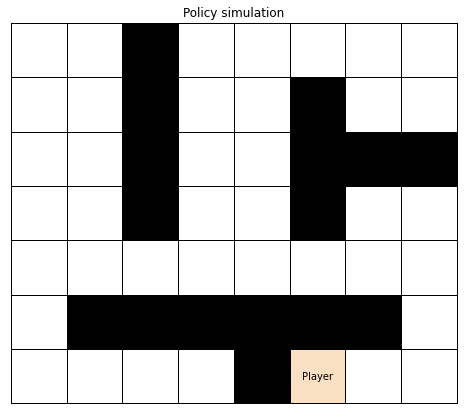

In [22]:
# Show the shortest path
mz.animate_solution(maze, path)

In [29]:
m = np.array([[1, 2], [3, 4]])

In [30]:
np.linalg.norm(m)

5.477225575051661

In [31]:
m.flatten()

array([1, 2, 3, 4])

In [32]:
np.linalg.norm(m.flatten())

5.477225575051661

## Random rewards 

### The new MDP formulation 
As stated in the problem statement, we only modify the rewards $\mathcal{R}$ to be random. In fact we will only need to modify the rewards corresponding to the state action pair $(s,a)$ that lead to either the cell R1 or R2.
#### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles.    
   - If at state $s$, taking action $a$, leads to the cell R1 then the reward is random according to the following     $$ R(s,a) = \begin{cases}
            -7 \quad \textrm{ w.p. } 0.5 \\
            -1 \quad \textrm{ w.p. } 0.5
            \end{cases} 
     $$
   - If at state $s$, taking action $a$, leads to the cell R2 then the reward is random according to the following 
     $$ R(s,a) = \begin{cases}
            -2 \quad \textrm{ w.p. } 0.5 \\
            -1 \quad \textrm{ w.p. } 0.5
            \end{cases} 
     $$
   - The remaining rewards remain deterministic and with the same values as in the previous formulation.

> **Note**: The fact that you stay in a cell for a number of rounds $n$ means that you are forced to incur the reward of ending up in that state for an additional $n$ times. Thus, instead of modifying the transition probabilities, we can modify the reward of ending up at that round by multiplying it by $n + 1$.  

### Solving the new MDP 
As mentioned in the appendix [random_rewards.pdf]() (see in canvas), when solving the problem we will only have to look at the average rewards instead of the realization of the rewards, and the methods implemented for the previous case remain unchanged.  

> **Note**: In the implementation, the only change will be the rewards. In addition, the policies we obtain remain deterministic. However, when running a policy the accumulated reward is random, but its average over multiple repetitions should converge to the value function. 

In [11]:
# Description of the maze as a numpy array
maze = np.array([
    [ 0, 0, 1, 0, 0, 0,  0],
    [ 0, 0, 1, 0, 0, 0,  0],
    [ 0, 0, 1, 0, 0, 0,  0],
    [ 0, 0, 0, 0, 0, 0, -1],
    [ 0, 1, 1, 1, 1, 1,  0],
    [-6, 0, 0, 0, 0, 2,  0]
])
# with the convention 
#  0 = empty cell
#  1 = obstacle
#  2 = exit of the Maze
# -n = trapped cell with probability 0.5. If the cell is trapped the player must stay there for n times.  

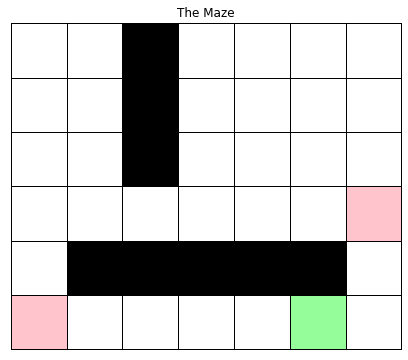

In [12]:
mz.draw_maze(maze);

### Dynamic programming 

Run the following python code to obtain the optimal solution of the newly formulated MDP with dynamic programming. 

In [13]:
# Create an environment maze
env = mz.Maze(maze, random_rewards=True)
# env.show()

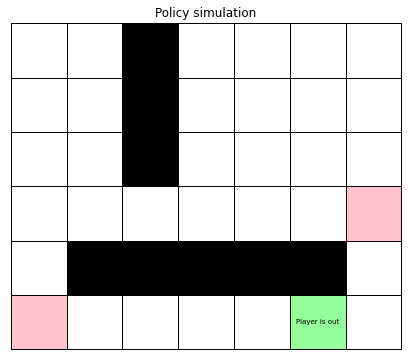

In [14]:
# Finite horizon
horizon = 15
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);
# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0);
path = env.simulate(start, policy, method);
# Show the shortest path 
mz.animate_solution(maze, path)

> **Note:** The animation does not illustrate the event where the player is trapped as it assumes average rewards. Nonetheless, the shown policy is the optimal one.     

### Value iteration  

Run the following python code to obtain the optimal solution of the newly formulated MDP with value iteration.

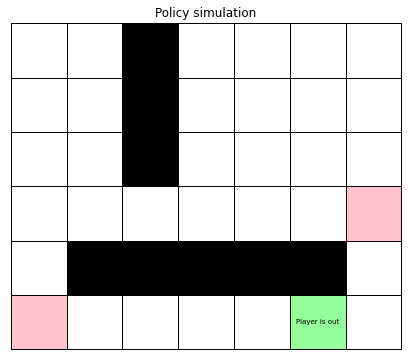

In [15]:
# Discount Factor 
gamma   = 0.95; 
# Accuracy treshold 
epsilon = 0.0001;
V, policy = mz.value_iteration(env, gamma, epsilon)

method = 'ValIter';
start  = (0,0);
path = env.simulate(start, policy, method)
# Show the shortest path 
mz.animate_solution(maze, path)

# Problem 2 : Plucking berries

### The new MDP formulation 

In this problem, the introduction of weights is translated in our previous MDP formulation by a modification of the rewards $\mathcal{R}$. This is done by simply setting $r(s,a)$ to $w_{ij}$ if being in state $s$ and taking action $a$ leads to being in th new state $s'=(i,j)$. 

In [16]:
# Description of the maze as a numpy array
maze = np.array([
    [ 0, 0, 1, 0, 0, 0,  0],
    [ 0, 0, 1, 0, 0, 0,  0],
    [ 0, 0, 1, 0, 0, 0,  0],
    [ 0, 0, 0, 0, 0, 0,  0],
    [ 0, 1, 1, 1, 1, 1,  0],
    [ 0, 0, 0, 0, 0, 2,  0]
])

# Description of the weight matrix as a numpy array
w = np.array([
    [0,    1, -100,   10,   10,   10, 10],
    [0,    1, -100,   10,    0,    0, 10],
    [0,    1, -100,   10,    0,    0, 10],
    [0,    1,    1,    1,    0,    0, 10],
    [0, -100, -100, -100, -100, -100, 10],
    [0,    0,    0,    0,    0,   11, 10]
])

In [17]:
# Create an environment maze
env = mz.Maze(maze, weights=w)
# env.show()

### Dynamic programming 

Run the following python code to obtain the optimal solution of the newly formulated MDP with dynamic programming.

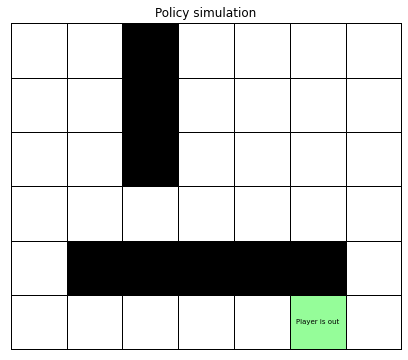

In [18]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);
# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0);
path = env.simulate(start, policy, method);
# Show the shortest path 
mz.animate_solution(maze, path)

> **Note:** By changing the horizon from $20$ to $12$ you should observe that the optimal policy changes.  

### Value iteration  

Run the following python code to obtain the optimal solution of the newly formulated MDP with value iteration.

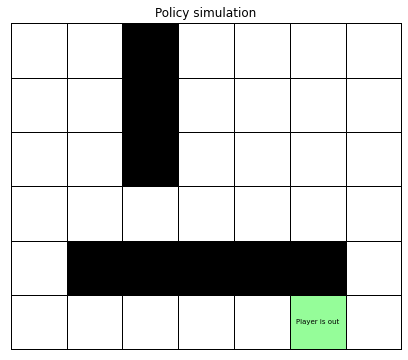

In [19]:
# Discount Factor 
gamma   = 0.50; 
# Accuracy treshold 
epsilon = 0.001;
V, policy = mz.value_iteration(env, gamma, epsilon)
method = 'ValIter';
start  = (0,0);
path = env.simulate(start, policy, method)
# Show the shortest path 
mz.animate_solution(maze, path)